# Linear Regression

Linear regression is a supervised machine learning algorithm which tries to find the best fit linear relashionship between independant variables (x1, x2...) (the input) and one dependant variable y (the output).

When applying linear regression, we assumer there is a *linear relationship* between the input features and the output which means changes in the input implies proportional changes in the output, we assume also *independance of instances* (the value of the dependant variable does not rely on the value of the dependant variable of any other instance)

There is two types of linear regression, **simple linear regression** which involves one independant variable, example: Predicting the salary of employees based on years of experience:
$$
\hat{y} = \beta_0 + \beta_1 X
$$
$\beta_0$: The bias term (intercept).

$\beta_1$: The slope.

$\hat{y}$: the predicted salary.

X: the input varaible.

The second type is **multiple linear regression** where we have more than just one independant variable (feature) and one dependant variable (the output):
$$
\hat{y}  = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Linear regression implies finding the best fitting linear relationship between the dependant variable and the independant variable which means *training the model*, but how do we know that certain values form the best fitting relationship? for this we need to evaluate the model using a **loss function**.

One of the most used loss functions in linear regression is the **MSE function**:
$$
J = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

m: number of instances in our trainig data.

$\hat{y}$: the predicted value for instance i.

$y_i$: the actual values of the output for instance i.

You might ask another question, how can we find the best fitting linear relationship? in other words, how can we train our model is sort of minimizing the cost function ? 

The answer is: we apply **The normal equation** or **Gradient descent algorithm**.

The normal equation:
$$
\hat{\theta} = (X^\top X)^{-1} X^\top Y
$$
Y: the vetor of target values.

The normal equation gets slower when the number of features grows large (exponential complexity with regarding to the number of features n), and linear complexity with regarding to the number of instances m (handle effictively large trainig sets).

The idea of Gradient descent optimization algorithm is to randomly initialize the parameters, then iteratively update these values until convergence (finding the optimal values), the update of the parameters is done this way:
$$
\theta_i = \theta_i - \alpha \frac{\partial J(\theta)}{\partial \theta_i}
$$
$\alpha$: **learning rate hyperparameter**, if the learning rate is too high, GD may diverge, in the other hand if the learning rate is too low, GD may take much more iterations to converge. 

When applying GD, we should ensure all features have the same scale (by applying **standarization** or **normalization**), if not the algorithm will take more iterations to converge
After training our model, how to evaluate it ? the answer is: use a **cost fnction**.

The difference between **loss function** and **cost function (Performance measure)** is that loss function is used during training and cost function is used to evaluate the model after training.

The cost functions used in linear regression are:

- MSE:
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

- MAE:
$$
MAE = \frac{1}{m} \sum_{i=1}^{m} |Y_i - \hat{Y}_i|
$$

The MAE function is less sensitive to outliers than the MSE.

- RMSE:
$$
RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (Y_i - \hat{Y}_i)^2}
$$

- R-squared:
$$
R^2 = 1 - \frac{\sum (Y_i - \hat{Y}_i)^2}{\sum (Y_i - \bar{Y})^2}
$$
R-squared indicated how much variation can the model explain.

  0<R-squared<1, Greater R-squared is better.

# Simple Linear regression

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [142]:
df = pd.read_csv("data/Salary_dataset.csv")

In [144]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [146]:
df = df.drop("Unnamed: 0", axis = 'columns')

In [148]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [150]:
X = df["YearsExperience"]
Y = df["Salary"]

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

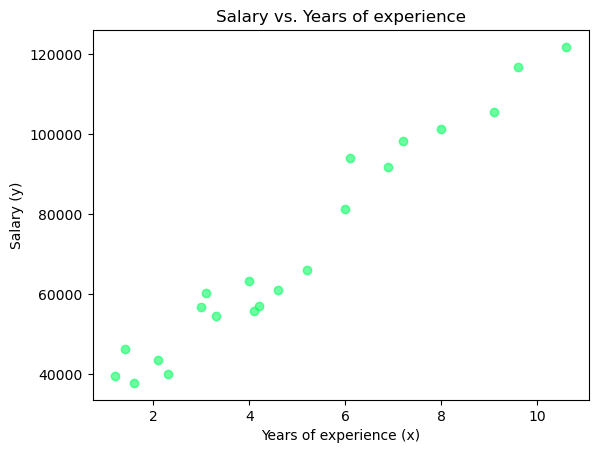

In [154]:
plt.scatter(X_train, Y_train, color = '#07ff61', alpha=0.6)
plt.xlabel("Years of experience (x)")
plt.ylabel("Salary (y)")
plt.title("Salary vs. Years of experience")
plt.show()

In [158]:
regr = LinearRegression() # Uses the normal equation (OLS) for training
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.flatten()
regr.fit(X_train, Y_train)

LinearRegression()

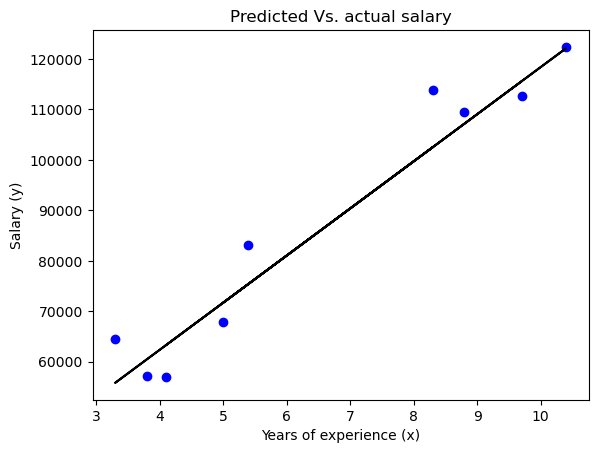

In [162]:
X_test = X_test.values.reshape(-1, 1)
y_pred = regr.predict(X_test)
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Years of experience (x)")
plt.ylabel("Salary (y)")
plt.title("Predicted Vs. actual salary")
plt.show()

In [166]:
MSE = mean_squared_error(Y_test, y_pred)
MAE = mean_absolute_error(Y_test, y_pred)
RMSE = root_mean_squared_error(Y_test, y_pred)
R2_score = r2_score(Y_test, y_pred)

print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")
print(f"R2 score: {R2_score}")

MSE: 37784662.46621308
MAE: 5161.328710400178
RMSE: 6146.9230079945755
R2 score: 0.9414466227178215


In [173]:
weights = regr.coef_
bias = regr.intercept_

print("Weight:", weights[0])
print("bias:", bias)

Weight: 9339.081723815198
bias: 24985.53016251169


# Multiple linear regression

In [225]:
df = pd.read_csv("data/Student_Performance.csv")

In [227]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [229]:
df = df.drop("Extracurricular Activities", axis='columns')
df.corr() 

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [231]:
df = df.drop(["Sample Question Papers Practiced", "Sleep Hours"], axis='columns')
df.head()

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0


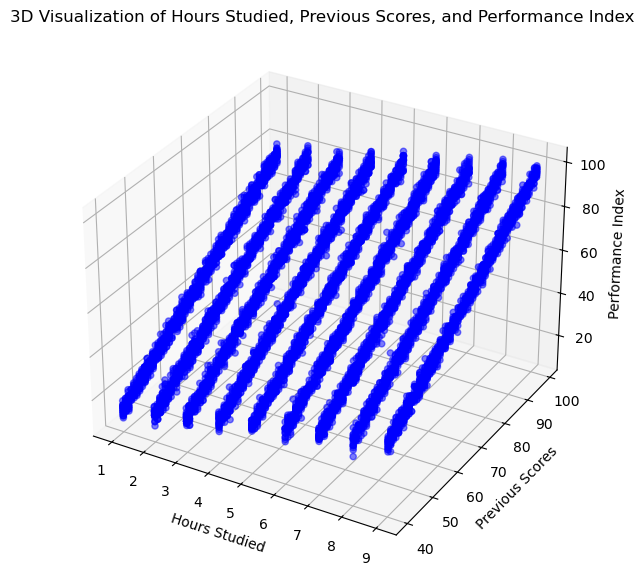

In [233]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hours Studied'], df['Previous Scores'], df['Performance Index'], c='b', marker='o', alpha=0.5)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')
ax.set_title('3D Visualization of Hours Studied, Previous Scores, and Performance Index')
plt.show()

In [237]:
X = df[['Hours Studied', 'Previous Scores']]
Y = df["Performance Index"]

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [241]:
regr.fit(X_train, Y_train)

LinearRegression()

In [243]:
y_pred = regr.predict(X_test)

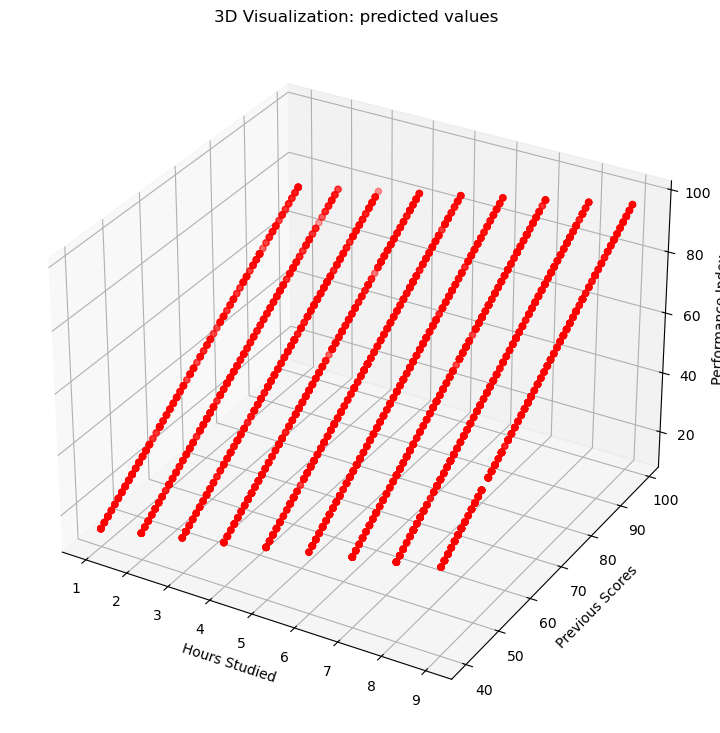

In [263]:
# Création du graphique 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Hours Studied'], X_test['Previous Scores'], y_pred, c='r', marker='o', label="Predictions")

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')
ax.set_title('3D Visualization: predicted values')

plt.show()

In [265]:
MSE = mean_squared_error(Y_test, y_pred)
MAE = mean_absolute_error(Y_test, y_pred)
RMSE = root_mean_squared_error(Y_test, y_pred)
R2_score = r2_score(Y_test, y_pred)

print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")
print(f"R2 score: {R2_score}")

MSE: 5.201346140631685
MAE: 1.8101437492369945
RMSE: 2.280645991957473
R2 score: 0.9859445764337783


In [267]:
weights = regr.coef_
bias = regr.intercept_

print("Weights:", weights)
print("bias:", bias)

Weights: [2.86449217 1.01615225]
bias: -29.605360900459992
